In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
from sklearn import preprocessing
from sklearn.preprocessing import scale
from argparse import Namespace

sns.set(rc={"figure.figsize" : (10,8)})

In [4]:
args = Namespace(
    target = "expenses",
    data_file="insurance.csv",
    cv=10)

In [5]:
premium = pd.read_csv(args.data_file)
df=premium.copy()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [8]:
df.shape

(1338, 7)

In [9]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [99]:
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


## benzersiz değerleri görüntüleme (unique())


In [12]:
df["sex"].unique()

array(['female', 'male'], dtype=object)

In [13]:
df["children"].unique()

array([0, 1, 3, 2, 5, 4], dtype=int64)

In [14]:
df["region"].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [15]:
df["age"].unique()

array([19, 18, 28, 33, 32, 31, 46, 37, 60, 25, 62, 23, 56, 27, 52, 30, 34,
       59, 63, 55, 22, 26, 35, 24, 41, 38, 36, 21, 48, 40, 58, 53, 43, 64,
       20, 61, 44, 57, 29, 45, 54, 49, 47, 51, 42, 50, 39], dtype=int64)

In [16]:
df["smoker"].unique()

array(['yes', 'no'], dtype=object)

## benzersiz değerlerın dağılımı value_counts()


In [17]:
df["sex"].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [18]:
df["smoker"].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [19]:
df["region"].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [20]:
df["children"].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

# distribution

## age distribution

In [21]:
#age distribution

df["age"].describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

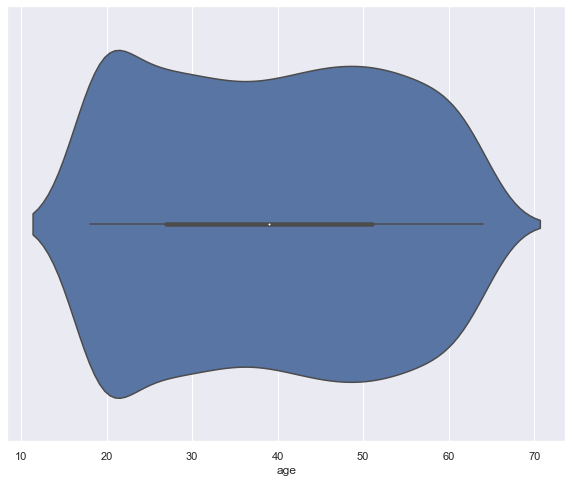

In [22]:
sns.violinplot(df["age"]);

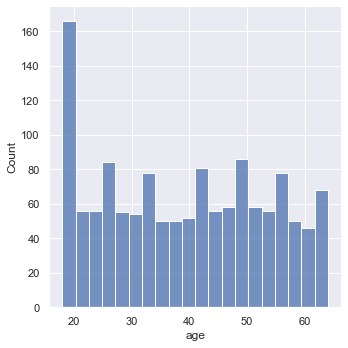

In [23]:
sns.displot(df["age"] , bins=20);

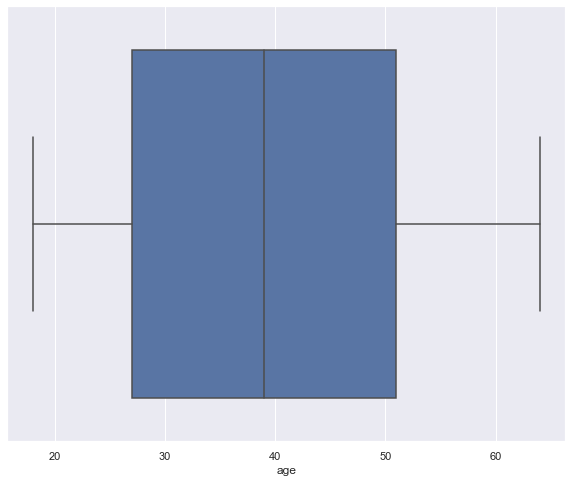

In [24]:
sns.boxplot(df["age"] );

## bmi distribution

In [25]:
df["bmi"].describe()

count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64

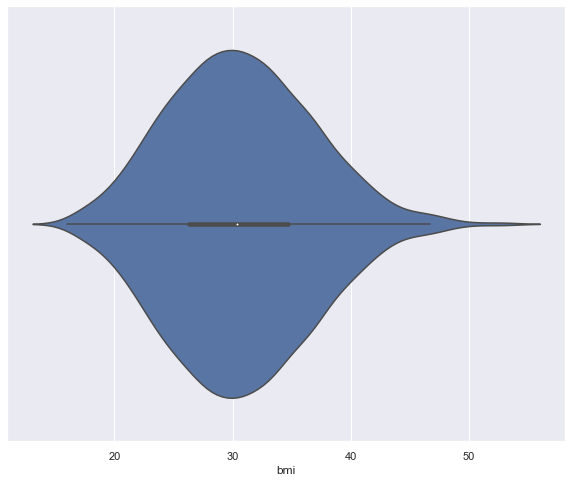

In [26]:
sns.violinplot(df["bmi"]);

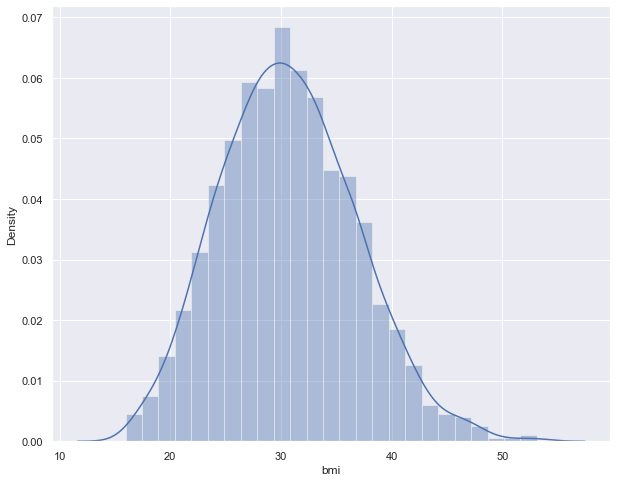

In [27]:
sns.distplot(df["bmi"]);

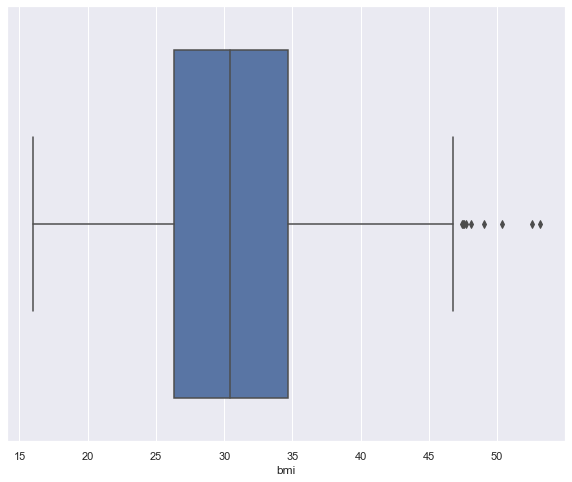

In [28]:
sns.boxplot(df["bmi"]);

## children distribution

In [29]:
df["children"].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

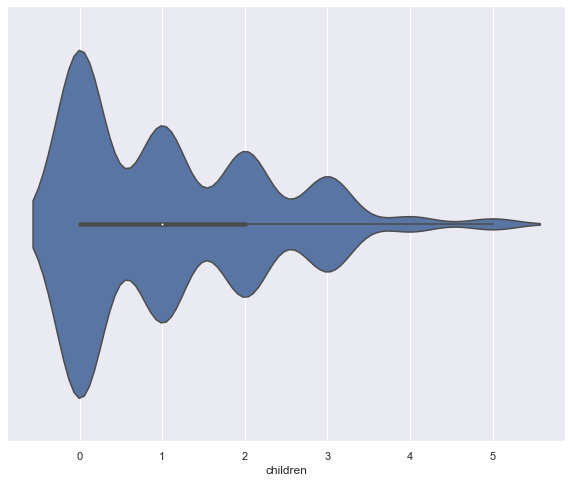

In [30]:
sns.violinplot(df["children"]);

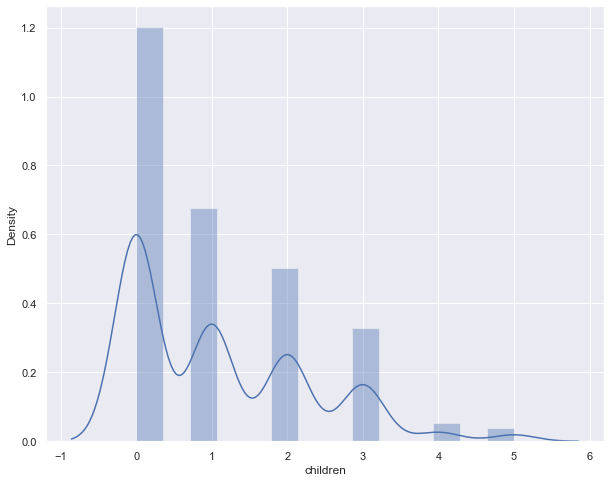

In [31]:
sns.distplot(df["children"]);

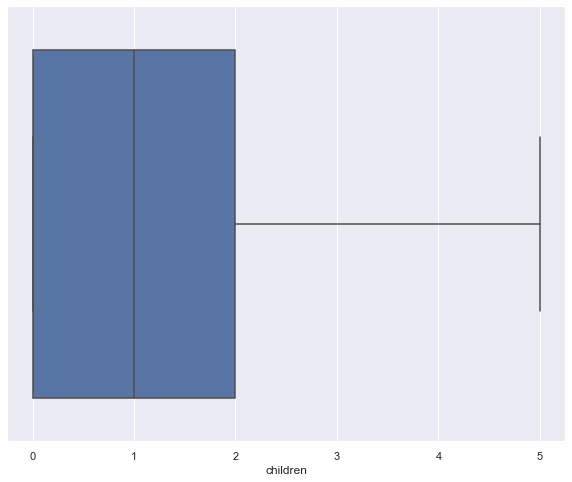

In [32]:
sns.boxplot(df["children"]);

## sex distribution

In [100]:
df["sex"].value_counts()

male      676
female    662
Name: sex, dtype: int64

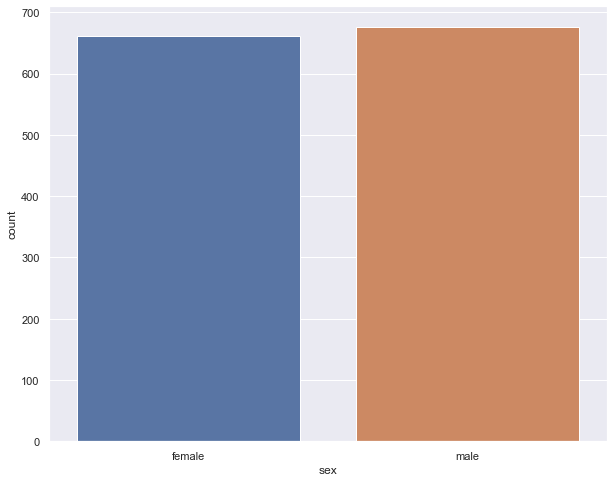

In [101]:
sns.countplot(df["sex"]);

## smoker distribution

In [35]:
df["smoker"].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

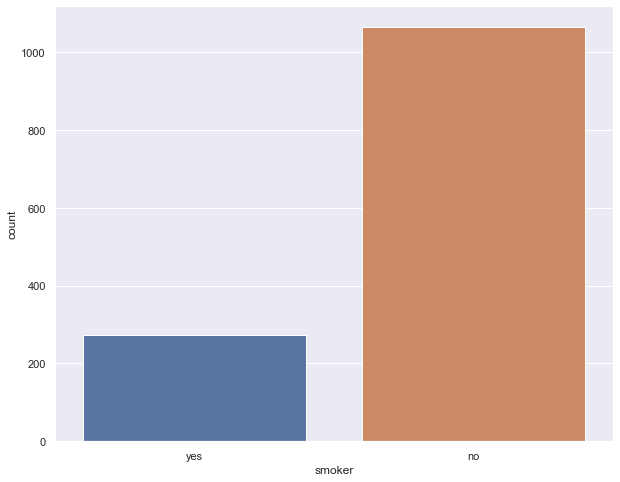

In [36]:
sns.countplot(df["smoker"]);

## region distribution

In [37]:
df["region"].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

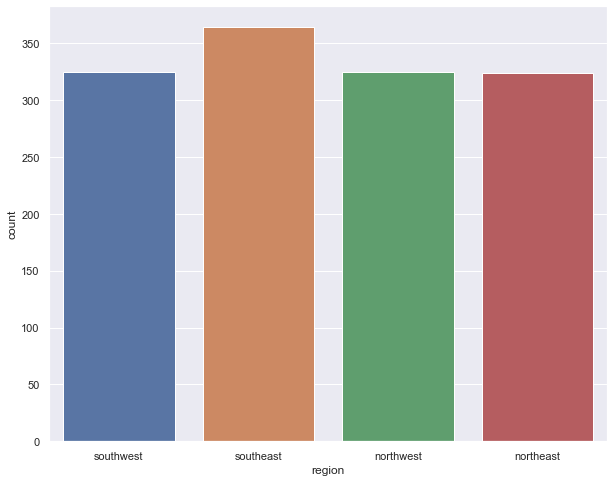

In [38]:
sns.countplot(df["region"]);

## charges distribution

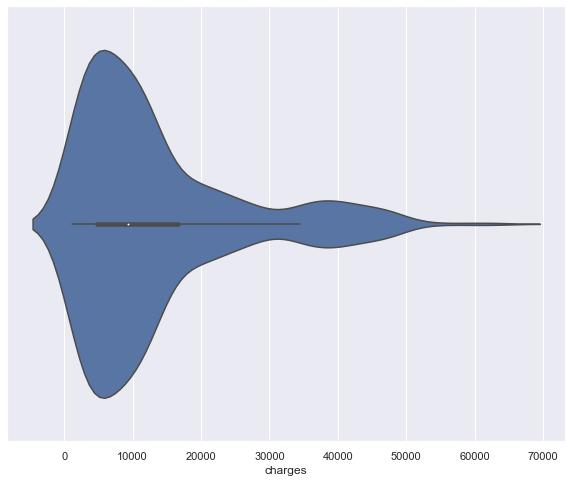

In [39]:
sns.violinplot(df["charges"]);

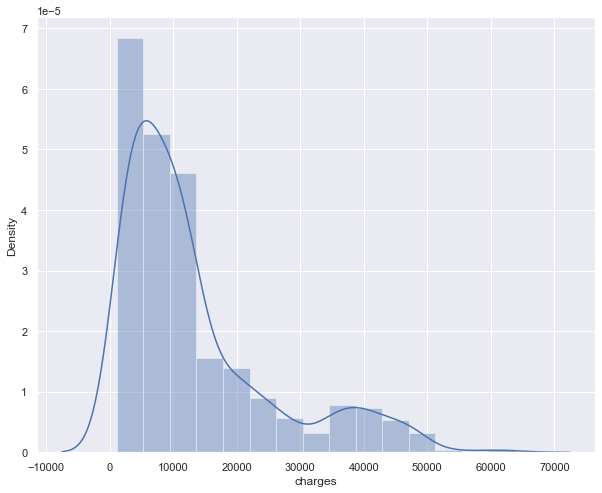

In [40]:
sns.distplot(df["charges"], bins=15);

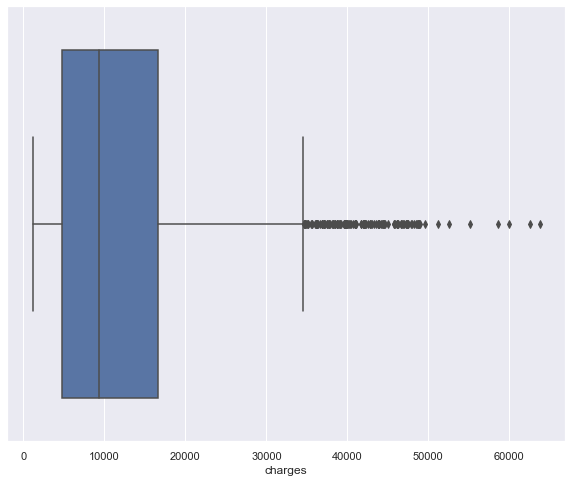

In [41]:
sns.boxplot(df["charges"]);

### iki boyutlu yaş analizi

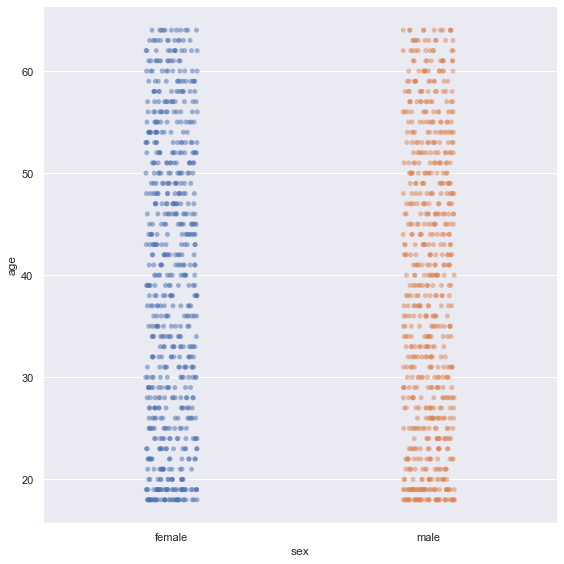

In [42]:
#iki boyutlu yaş analizi

sns.catplot(x="sex" , y="age" , data=df , height=8,alpha= .5);

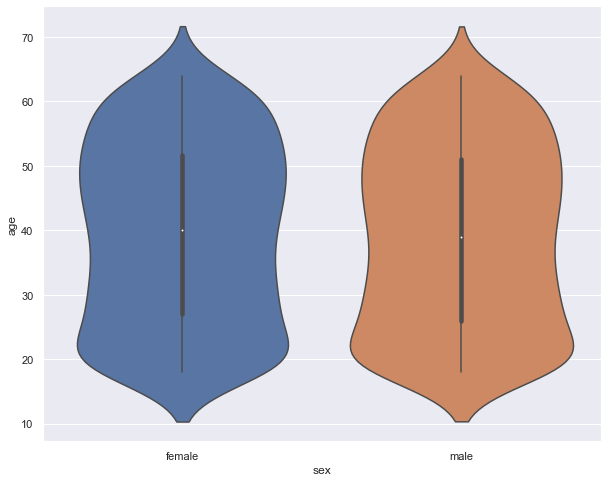

In [43]:
sns.violinplot(x="sex",y="age",data=df,height=8, alpha= .5);

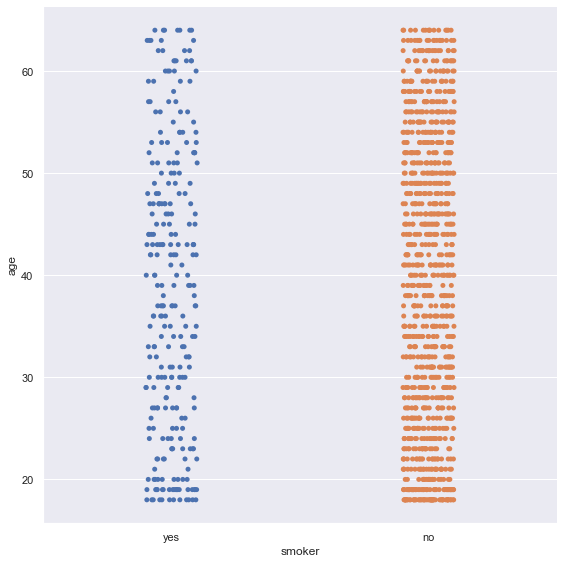

In [44]:
#smoker , age
sns.catplot(x="smoker" , y="age" , data=df , height=8);

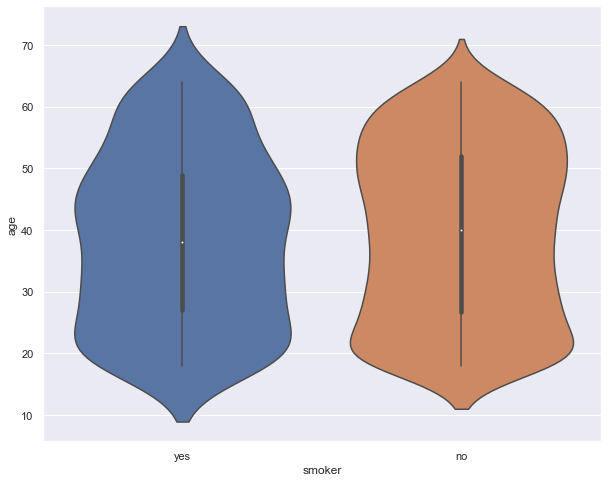

In [45]:
sns.violinplot(x="smoker" , y="age" , data=df , height=8);

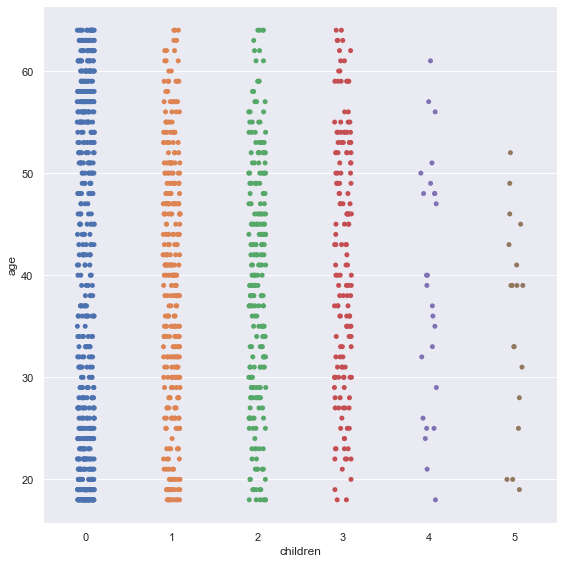

In [46]:
#children,age
sns.catplot(x="children" , y="age" , data=df , height=8);

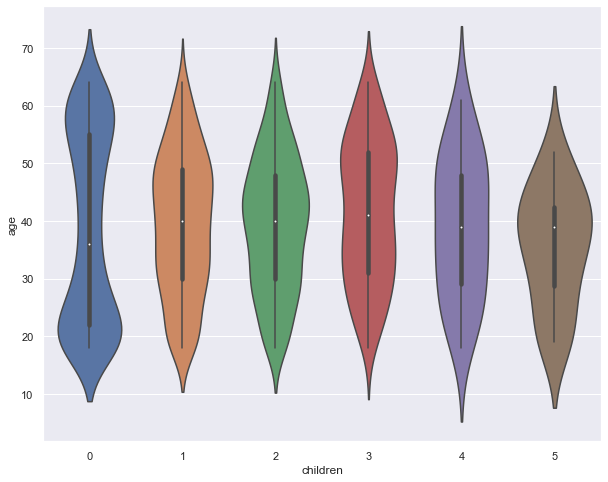

In [47]:
sns.violinplot(x="children" , y="age" , data=df , height=8,alpha=.5);

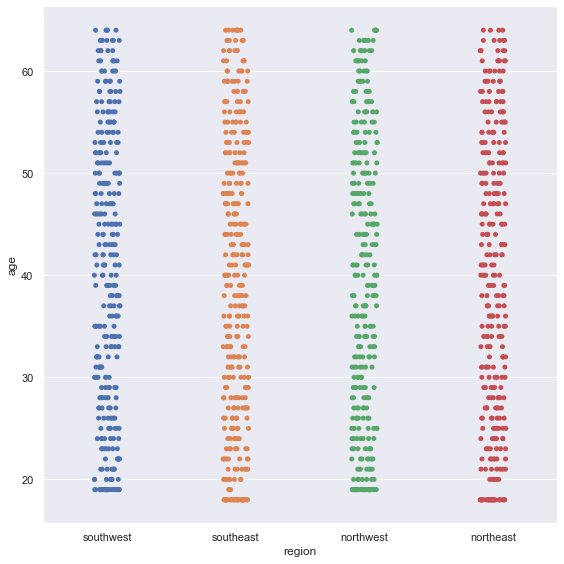

In [48]:
#region,age

sns.catplot(x="region" , y="age" , data=df , height=8);

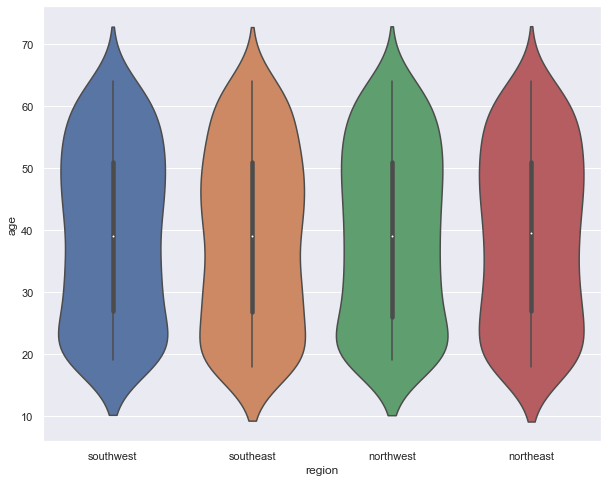

In [49]:
sns.violinplot(x="region" , y="age" , data=df , height=8);

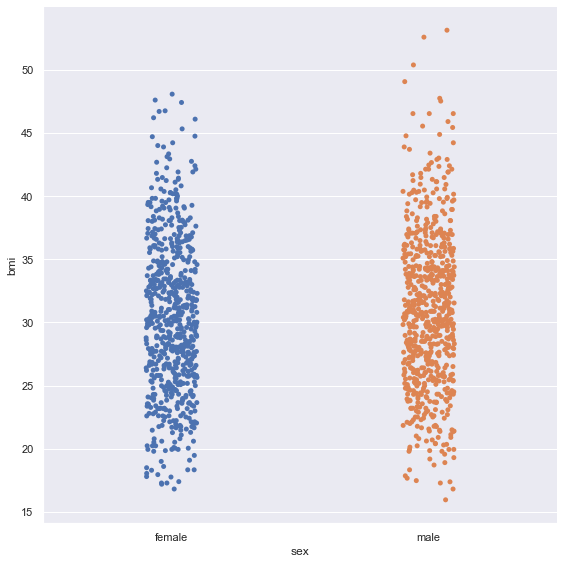

In [50]:
#sex,bmi

sns.catplot(x="sex", y="bmi" , data=df, height=8);

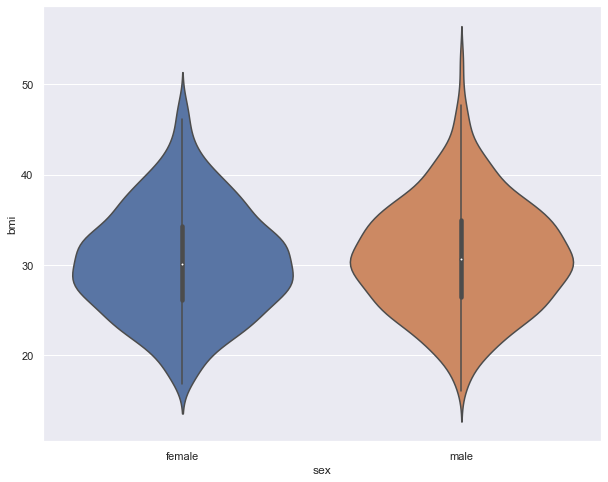

In [51]:
sns.violinplot(x="sex", y="bmi" , data=df, height=8);

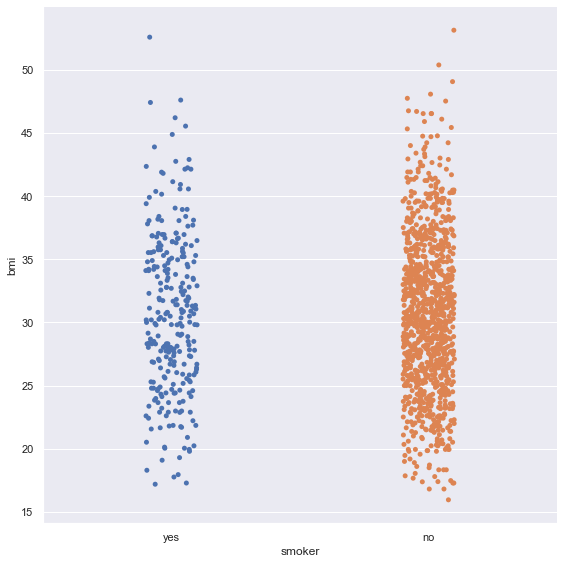

In [52]:
#smoker,bmi

sns.catplot(x="smoker", y="bmi" , data=df, height=8);

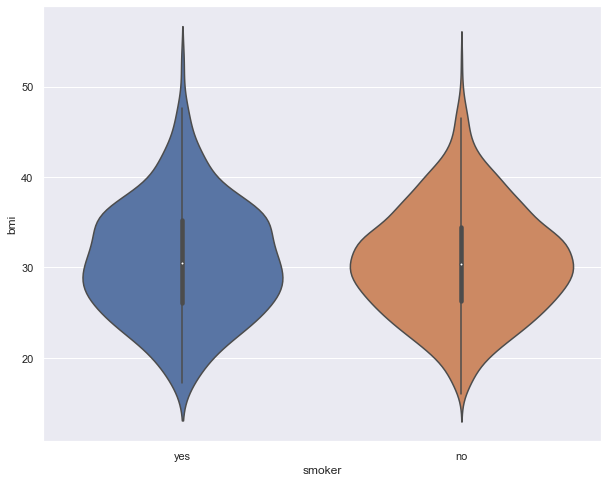

In [53]:
sns.violinplot(x="smoker", y="bmi" , data=df, height=8);

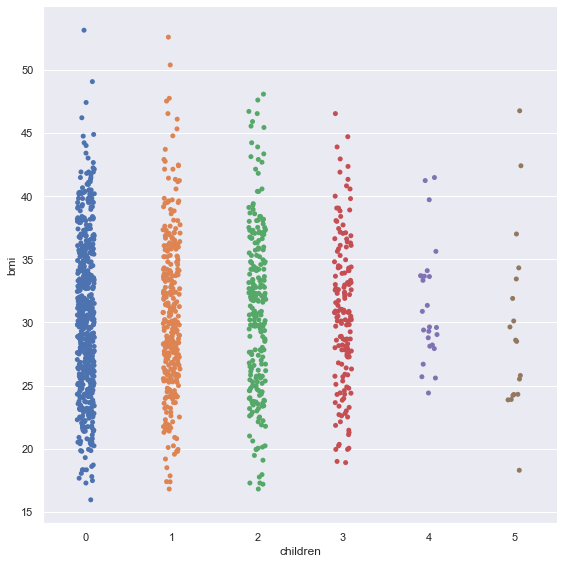

In [54]:
#children,bmi

sns.catplot(x="children", y="bmi" , data=df, height=8);

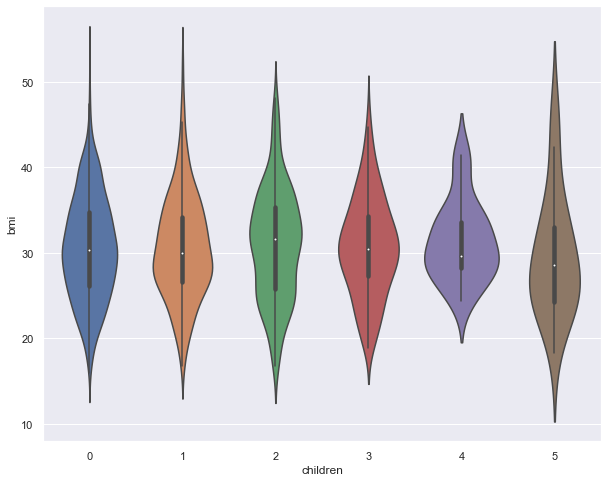

In [55]:
sns.violinplot(x="children", y="bmi" , data=df, height=8);

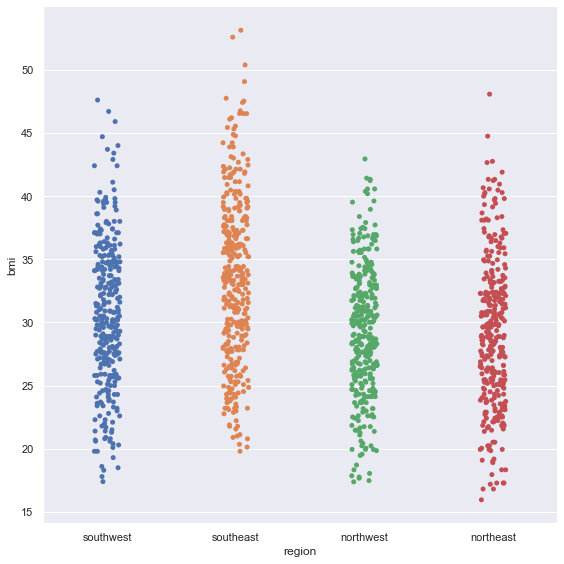

In [56]:
#region,bmi

sns.catplot(x="region", y="bmi" , data=df, height=8);

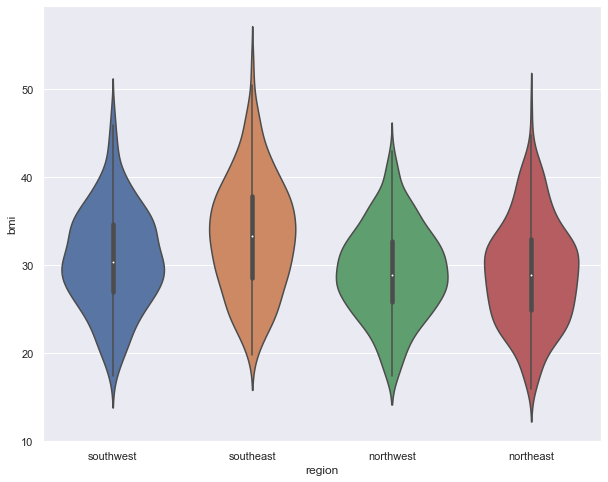

In [57]:
sns.violinplot(x="region", y="bmi" , data=df, height=8);

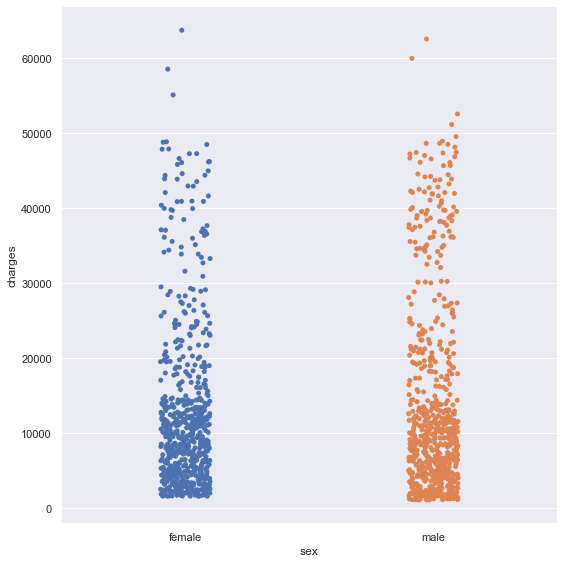

In [58]:
#sex,charges

sns.catplot(x="sex", y="charges" , data=df, height=8);

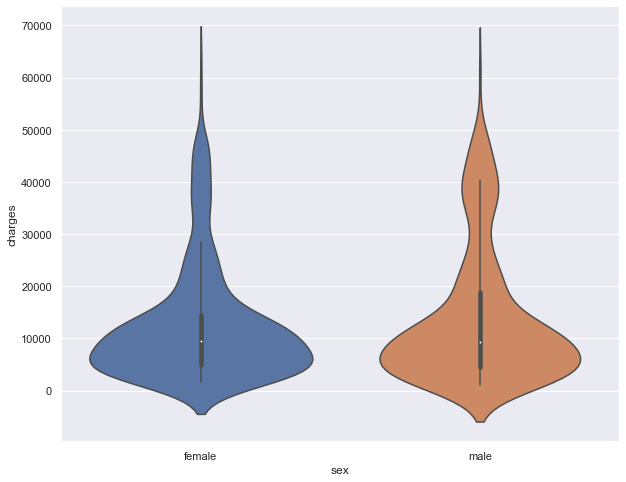

In [59]:
sns.violinplot(x="sex", y="charges" , data=df, height=8);

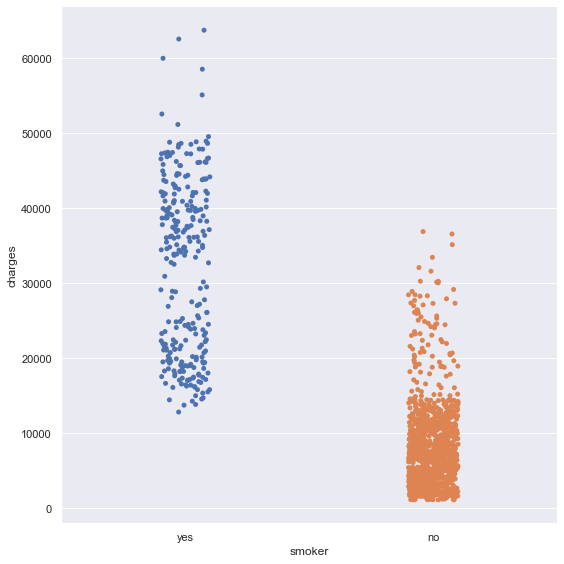

In [60]:
#smoker,charges

sns.catplot(x="smoker", y="charges" , data=df, height=8);

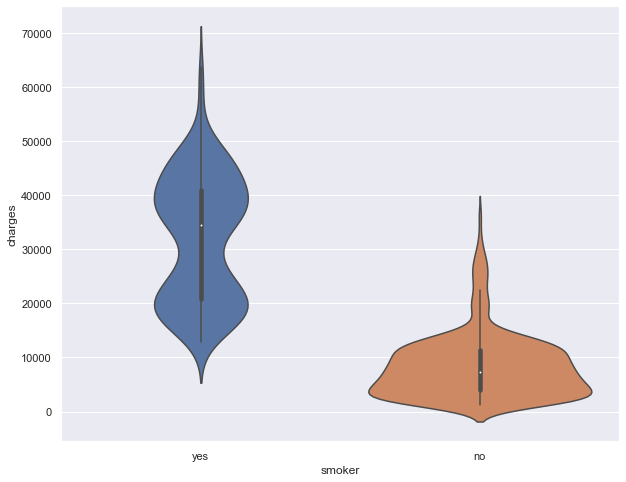

In [61]:
sns.violinplot(x="smoker", y="charges" , data=df, height=8);

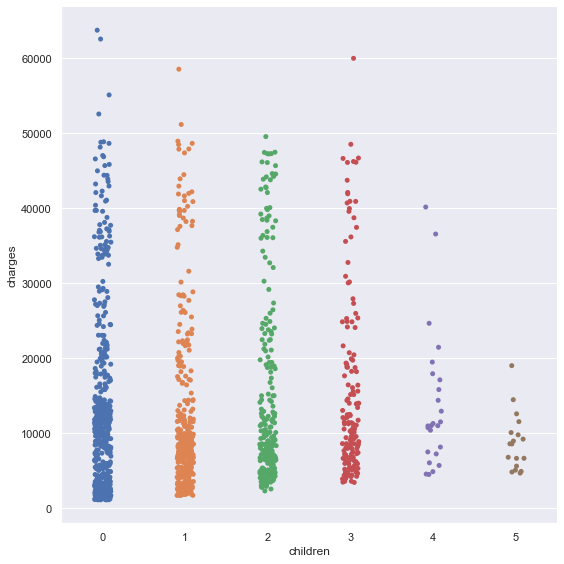

In [62]:
#chidren,charges

sns.catplot(x="children", y="charges" , data=df, height=8);

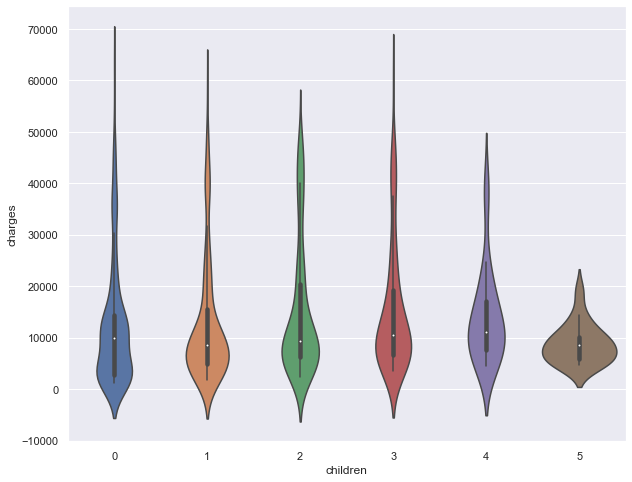

In [63]:
sns.violinplot(x="children", y="charges" , data=df, height=8);

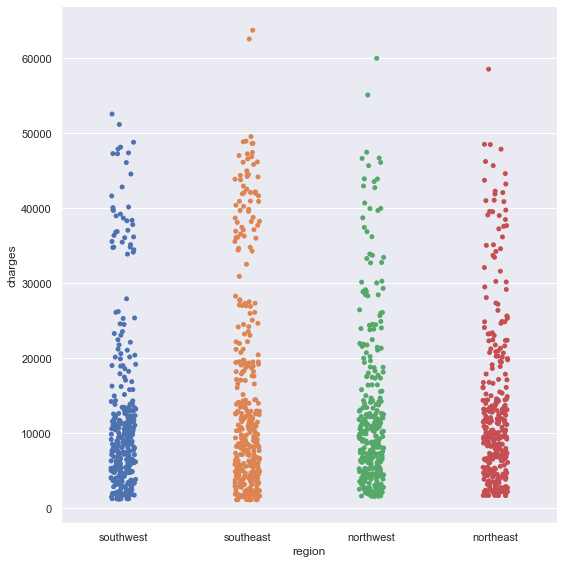

In [64]:
#region,charges

sns.catplot(x="region", y="charges" , data=df, height=8);

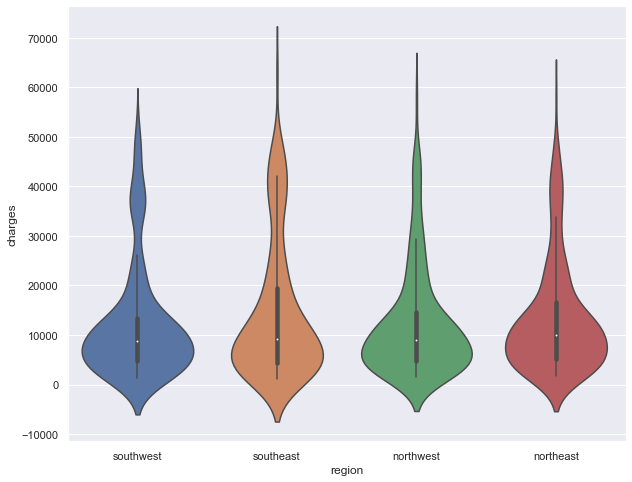

In [65]:
sns.violinplot(x="region", y="charges" , data=df, height=8);

## Sürekli dağılım


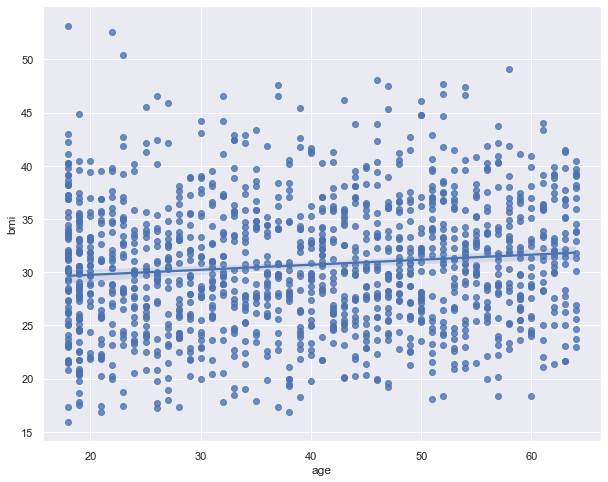

In [66]:
#age, bmi

sns.regplot("age", "bmi", data=df);

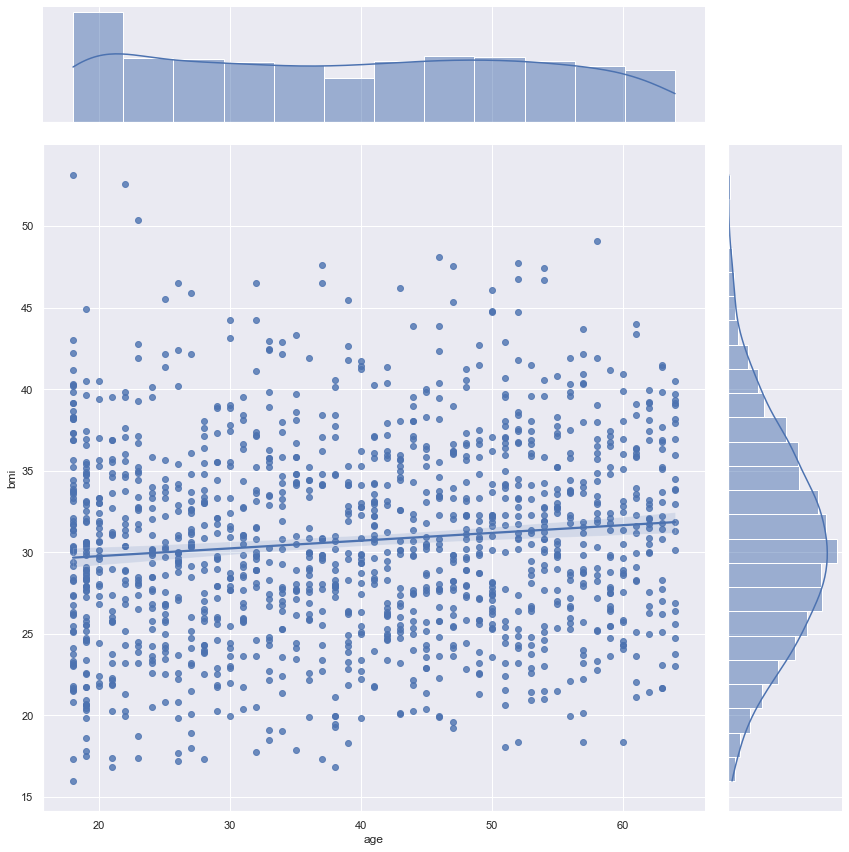

In [67]:
sns.jointplot("age", "bmi", data=df, kind="reg", height=12);

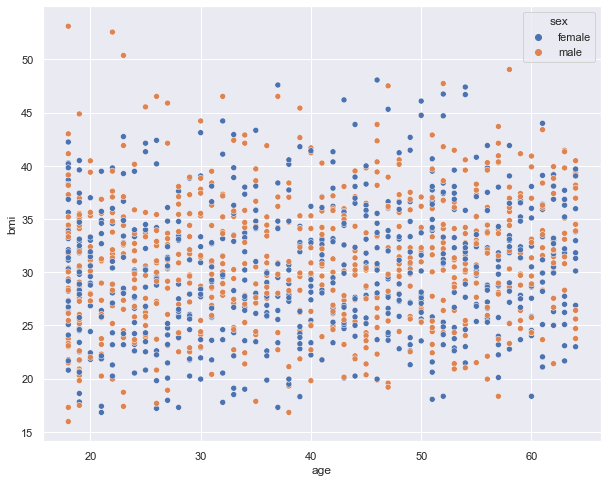

In [68]:
sns.scatterplot("age","bmi","sex", data=df);

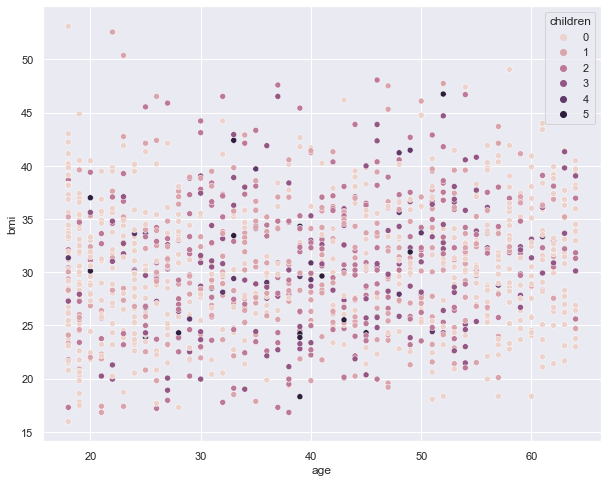

In [69]:
sns.scatterplot("age","bmi","children", data=df);

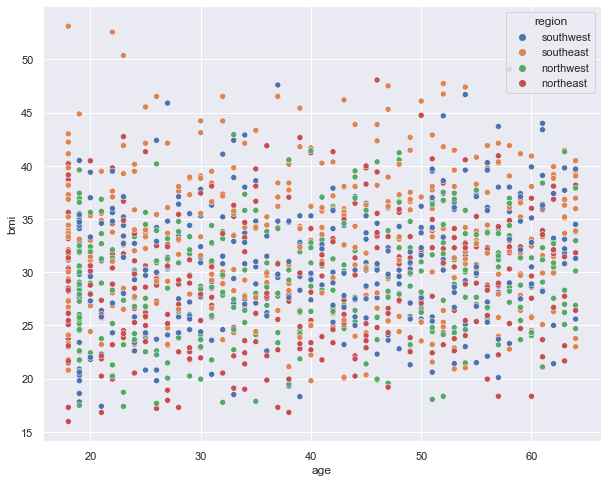

In [70]:
sns.scatterplot("age","bmi","region", data=df);

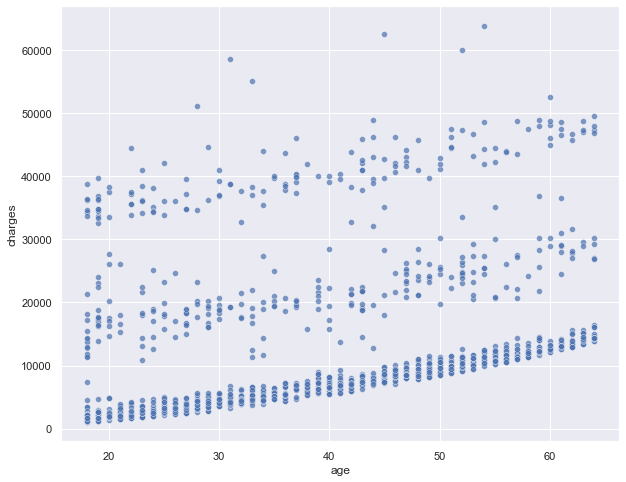

In [71]:
sns.scatterplot("age","charges", data=df ,alpha=.7);

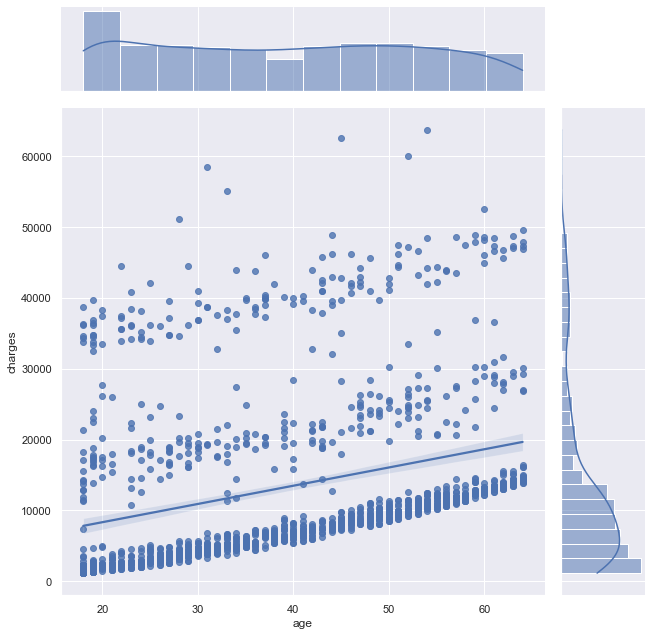

In [72]:
sns.jointplot("age","charges",data=df,kind="reg",height=9);

In [73]:
#TODO
#age,expenses,sex scatterplot
#age,expenses,children scatterplot
#age,expenses,region scatterplot

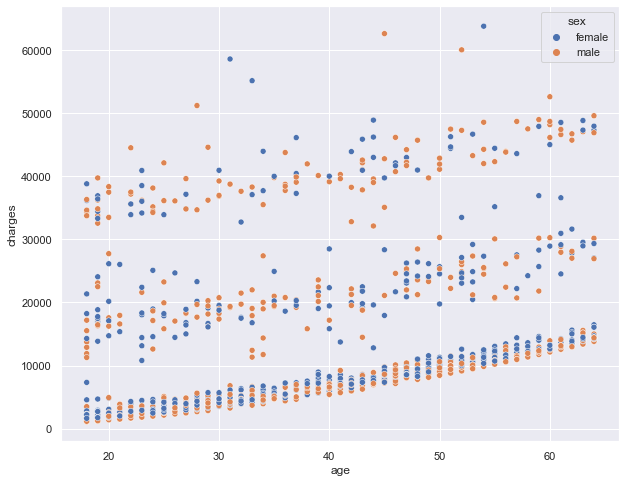

In [74]:
sns.scatterplot(x="age" , y="charges", hue="sex", data=df);

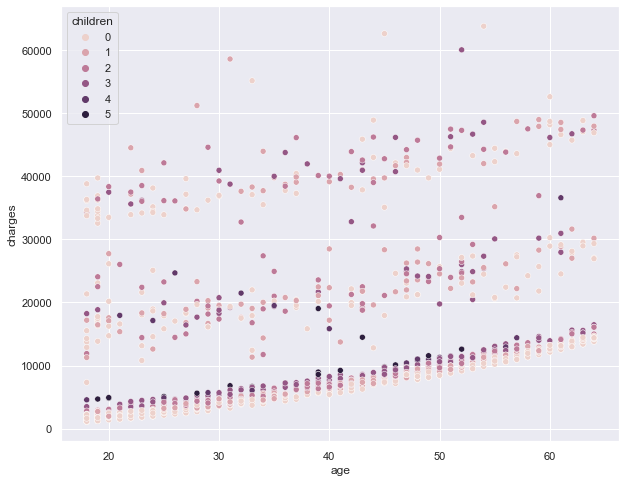

In [75]:
sns.scatterplot(x="age" , y="charges", hue="children", data=df);

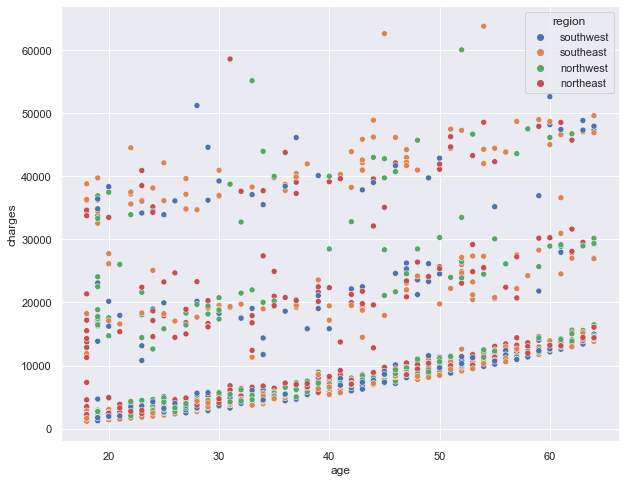

In [76]:
sns.scatterplot(x="age" , y="charges", hue="region", data=df);

### Sorgulama

In [77]:
#age

df.groupby(by="sex").describe()["age"]

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
female,662.0,39.503021,14.054223,18.0,27.0,40.0,51.75,64.0
male,676.0,38.917160,14.050141,18.0,26.0,39.0,51.00,64.0


In [78]:
df.groupby(by="smoker").describe()["age"]

,count,mean,std,min,25%,50%,75%,max
smoker,,,,,,,,
no,1064.0,39.385338,14.083410,18.0,26.75,40.0,52.0,64.0
yes,274.0,38.514599,13.923186,18.0,27.00,38.0,49.0,64.0


In [79]:
df.groupby(by="children").describe()["age"]

,count,mean,std,min,25%,50%,75%,max
children,,,,,,,,
0,574.0,38.444251,16.436228,18.0,22.00,36.0,55.0,64.0
1,324.0,39.453704,12.067445,18.0,30.00,40.0,49.0,64.0
2,240.0,39.445833,11.588715,18.0,30.00,40.0,48.0,64.0
3,157.0,41.566879,12.206174,18.0,31.00,41.0,52.0,64.0
4,25.0,39.000000,12.138094,18.0,29.00,39.0,48.0,61.0
5,18.0,35.611111,10.123583,19.0,28.75,39.0,42.5,52.0


In [80]:
df.groupby(by="region").describe()["age"]

,count,mean,std,min,25%,50%,75%,max
region,,,,,,,,
northeast,324.0,39.268519,14.069007,18.0,27.00,39.5,51.0,64.0
northwest,325.0,39.196923,14.051646,19.0,26.00,39.0,51.0,64.0
southeast,364.0,38.939560,14.164585,18.0,26.75,39.0,51.0,64.0
southwest,325.0,39.455385,13.959886,19.0,27.00,39.0,51.0,64.0


In [81]:
#TODO
#sorgulama bmi, sex,children,region gruplama
#sorgulama charges; sex, smoker,children,region gruplama

In [82]:
#bmi
df.groupby(by="sex").describe()["bmi"]

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
female,662.0,30.377749,6.046023,16.815,26.125,30.1075,34.31375,48.07
male,676.0,30.943129,6.140435,15.960,26.410,30.6875,34.99250,53.13


In [83]:
df.groupby(by="smoker").describe()["charges"]

,count,mean,std,min,25%,50%,75%,max
smoker,,,,,,,,
no,1064.0,8434.268298,5993.781819,1121.8739,3986.438700,7345.40530,11362.887050,36910.60803
yes,274.0,32050.231832,11541.547176,12829.4551,20826.244213,34456.34845,41019.207275,63770.42801


In [84]:
df.groupby(by="children").describe()["bmi"]

,count,mean,std,min,25%,50%,75%,max
children,,,,,,,,
0,574.0,30.550296,6.039106,15.960,26.14375,30.3025,34.74625,53.13
1,324.0,30.623148,6.101435,16.815,26.61500,30.0150,34.23750,52.58
2,240.0,30.978104,6.509644,16.815,25.78625,31.6400,35.35750,48.07
3,157.0,30.684331,5.787173,18.905,27.26500,30.4950,34.32000,46.53
4,25.0,31.391200,4.627211,24.415,28.21500,29.6400,33.66000,41.47
5,18.0,29.605000,7.139686,18.300,24.30250,28.5500,33.05500,46.75


In [85]:
df.groupby(by="region").describe()["bmi"]

,count,mean,std,min,25%,50%,75%,max
region,,,,,,,,
northeast,324.0,29.173503,5.937513,15.960,24.86625,28.88,32.89375,48.07
northwest,325.0,29.199785,5.136765,17.385,25.74500,28.88,32.77500,42.94
southeast,364.0,33.355989,6.477648,19.800,28.57250,33.33,37.81250,53.13
southwest,325.0,30.596615,5.691836,17.400,26.90000,30.30,34.60000,47.60


In [86]:
#charges
df.groupby(by="sex").describe()["charges"]

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
female,662.0,12569.578844,11128.703801,1607.5101,4885.1587,9412.96250,14454.691825,63770.42801
male,676.0,13956.751178,12971.025915,1121.8739,4619.1340,9369.61575,18989.590250,62592.87309


In [87]:
df.groupby(by="smoker").describe()["charges"]

,count,mean,std,min,25%,50%,75%,max
smoker,,,,,,,,
no,1064.0,8434.268298,5993.781819,1121.8739,3986.438700,7345.40530,11362.887050,36910.60803
yes,274.0,32050.231832,11541.547176,12829.4551,20826.244213,34456.34845,41019.207275,63770.42801


In [88]:
df.groupby(by="children").describe()["charges"]

,count,mean,std,min,25%,50%,75%,max
children,,,,,,,,
0,574.0,12365.975602,12023.293942,1121.8739,2734.421150,9856.95190,14440.123825,63770.42801
1,324.0,12731.171832,11823.631451,1711.0268,4791.643175,8483.87015,15632.052050,58571.07448
2,240.0,15073.563734,12891.368347,2304.0022,6284.939438,9264.97915,20379.276748,49577.66240
3,157.0,15355.318367,12330.869484,3443.0640,6652.528800,10600.54830,19199.944000,60021.39897
4,25.0,13850.656311,9139.223321,4504.6624,7512.267000,11033.66170,17128.426080,40182.24600
5,18.0,8786.035247,3808.435525,4687.7970,5874.973900,8589.56505,10019.943975,19023.26000


In [89]:
df.groupby(by="region").describe()["charges"]

,count,mean,std,min,25%,50%,75%,max
region,,,,,,,,
northeast,324.0,13406.384516,11255.803066,1694.7964,5194.322288,10057.652025,16687.3641,58571.07448
northwest,325.0,12417.575374,11072.276928,1621.3402,4719.736550,8965.795750,14711.7438,60021.39897
southeast,364.0,14735.411438,13971.098589,1121.8739,4440.886200,9294.131950,19526.2869,63770.42801
southwest,325.0,12346.937377,11557.179101,1241.5650,4751.070000,8798.593000,13462.5200,52590.82939


In [90]:
pd.pivot_table(df, values="charges" , index=["smoker"] , aggfunc=np.mean)

,charges
smoker,
no,8434.268298
yes,32050.231832


In [91]:
#TODO
#charges,sex pivot
#charges,children
#charges,region
#charges; index=["smoker","sex"]
#charges; index=["smoker","children"]
#charges; index=["smoker","region"]
#charges; index=["children","region"]

In [92]:
pd.pivot_table(df, values="charges" , index=["sex"] , aggfunc=np.mean)

,charges
sex,
female,12569.578844
male,13956.751178


In [93]:
pd.pivot_table(df, values="charges" , index=["children"] , aggfunc=np.mean)

,charges
children,
0,12365.975602
1,12731.171832
2,15073.563734
3,15355.318367
4,13850.656311
5,8786.035247


In [94]:
pd.pivot_table(df, values="charges" , index=["region"] , aggfunc=np.mean)

,charges
region,
northeast,13406.384516
northwest,12417.575374
southeast,14735.411438
southwest,12346.937377


In [95]:
pd.pivot_table(df, values="charges" , index=["smoker","sex"] , aggfunc=np.mean)

charges
smoker sex                 
no     female   8762.297300
       male     8087.204731
yes    female  30678.996276
       male    33042.005975

In [96]:
pd.pivot_table(df, values="charges" , index=["smoker" ,"children"] , aggfunc=np.mean)

charges
smoker children              
no     0          7611.793335
       1          8303.109350
       2          9493.093674
       3          9614.519391
       4         12121.344408
       5          8183.845556
yes    0         31341.363954
       1         31822.654334
       2         33844.235755
       3         32724.915268
       4         26532.276933
       5         19023.260000

In [97]:
pd.pivot_table(df, values="charges" , index=["smoker","region"] , aggfunc=np.mean)

charges
smoker region                 
no     northeast   9165.531672
       northwest   8556.463715
       southeast   8032.216309
       southwest   8019.284513
yes    northeast  29673.536473
       northwest  30192.003182
       southeast  34844.996824
       southwest  32269.063494

In [98]:
pd.pivot_table(df, values="charges" , index=["children","region"] , aggfunc=np.mean)

charges
children region                 
0        northeast  11626.462658
         northwest  11324.370919
         southeast  14309.868378
         southwest  11938.504986
1        northeast  16310.206403
         northwest  10230.256309
         southeast  13687.041971
         southwest  10406.484953
2        northeast  13615.152722
         northwest  13464.314687
         southeast  15728.470623
         southwest  17483.485559
3        northeast  14409.913296
         northwest  17786.160672
         southeast  18449.846015
         southwest  10402.442259
4        northeast  14485.193120
         northwest  11347.018725
         southeast  14451.023972
         southwest  14933.260533
5        northeast   6978.973483
         northwest   8965.795750
         southeast  10115.441542
         southwest   8444.158625